# D2Go Beginner's Tutorial

This is beginner tutorial for [d2go project](https://github.com/facebookresearch/d2go). We will go through some basic usage of d2go, including:
- Run inference on images or videos, with a pretrained d2go model
- Load a new dataset and train a d2go model
- Export models to int8 using post-training quantization. 

Please install d2go before running this tutorial following the [instructions](https://github.com/facebookresearch/d2go).

## Inference with Pre-trained Models

In this section, we will show how to load pretrained models using d2go model_zoo API, and how to make predictions with d2go models and visualize the output. 

- First import the model zoo API from d2go and get a pretrained Faster R-CNN model with FBNetV3 backbone

In [1]:
from d2go.model_zoo import model_zoo
model = model_zoo.get('faster_rcnn_fbnetv3a_C4.yaml', trained=True)

C:\Anaconda\envs\d2go_env\lib\site-packages\caffe2\__init__.py:5: UserWarning: Caffe2 support is not fully enabled in this PyTorch build. Please enable Caffe2 by building PyTorch from source with `BUILD_CAFFE2=1` flag.
  warnings.warn("Caffe2 support is not fully enabled in this PyTorch build. "
C:\Anaconda\envs\d2go_env\lib\site-packages\caffe2\proto\__init__.py:17: UserWarning: Caffe2 support is not enabled in this PyTorch build. Please enable Caffe2 by building PyTorch from source with `BUILD_CAFFE2=1` flag.
  warnings.warn('Caffe2 support is not enabled in this PyTorch build. '
INFO:d2go.modeling.backbone.fbnet_v2:Using un-unified arch_def for ARCH "FBNetV3_A" (without scaling):
trunk
- [('conv_k3', 16, 2, 1), ('ir_k3', 16, 1, 2, {'expansion': 1}, {'less_se_channels': False})]
- [('ir_k5', 24, 2, 1, {'expansion': 4}, {'less_se_channels': False}), ('ir_k5', 24, 1, 3, {'expansion': 3}, {'less_se_channels': False})]
- [('ir_k5_se', 32, 2, 1, {'expansion': 4}, {'less_se_channels': Fals

  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_2.dw.conv.weight
  roi_heads.mask_head

In [2]:
import torch
import torchvision
print(torch.cuda.is_available())
print(torch.__version__)
print(torchvision.__version__)


True
1.14.0.dev20221015
0.15.0.dev20221015


- Download an image from the COCO dataset:

In [3]:
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen
import numpy as np
import requests
from io import BytesIO
from PIL import Image


#req = urlopen('http://images.cocodataset.org/val2017/000000439715.jpg')
#arr = np.array(bytearray(url_response.read()), dtype=np.uint8)
#img = Image.open(BytesIO(requests.get('http://images.cocodataset.org/val2017/000000439715.jpg').content)) 
#img = cv2.imdecode(arr, -1)
#img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
im = cv2.imread('./image1.jpg')
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

- Then we can create a `DemoPredictor` to run inference on this image and see the raw outputs:

In [4]:
from d2go.utils.demo_predictor import DemoPredictor
predictor = DemoPredictor(model)
outputs = predictor(im)
# the output object categories and corresponding bounding boxes
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0, 17, 17, 17,  0, 20, 19,  0, 17, 20, 17, 22, 19, 19, 19],
       device='cuda:0')
Boxes(tensor([[123.7927, 241.3693, 479.7119, 480.0000],
        [276.2676, 147.8324, 365.5604, 400.5674],
        [ 51.7655, 279.1537,  78.7463, 341.4083],
        [504.6476, 261.5923, 587.4558, 335.0822],
        [331.7794, 234.2226, 410.3164, 307.9594],
        [408.7341, 285.3588, 462.1924, 353.3177],
        [  2.9676, 277.4062,  75.1786, 476.9588],
        [  3.1895, 277.9483,  75.0553, 476.4307],
        [504.8610, 262.9478, 592.3992, 338.9871],
        [556.2581, 270.3589, 595.2292, 355.6432],
        [  3.2825, 277.9409,  75.0487, 476.7887],
        [504.8292, 262.8485, 587.5205, 330.2833],
        [555.7502, 280.5951, 595.2925, 360.6317],
        [555.3552, 279.8566, 595.3694, 360.5119],
        [595.2863, 266.1798, 628.4792, 333.7033],
        [  2.7049, 277.7660,  75.3984, 476.8187],
        [555.5435, 276.6686, 598.2118, 355.9455]], device='cuda:0'))


C:\Anaconda\envs\d2go_env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3217.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


- Let's visualize the output predictions

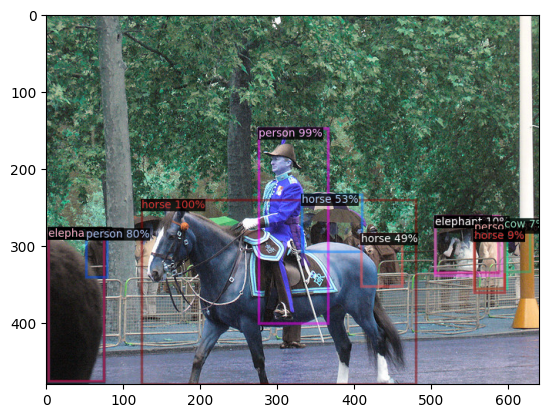

In [5]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("coco_2017_train"))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

## Train on a custom dataset
In this section, we show how to train a d2go model on a custom dataset.

We use [the balloon segmentation dataset](https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon)
which only has one class: balloon.
We'll train a balloon segmentation model from an existing model pre-trained on COCO dataset, available in d2go's [model zoo](https://github.com/facebookresearch/d2go/blob/master/MODEL_ZOO.md).

### Prepare the dataset

In [5]:
# download, decompress the data
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
#!unzip -o balloon_dataset.zip > /dev/null

D2Go is built on top of detectron2. Let's register the balloon dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).
Here, the dataset is in its custom format, therefore we write a function to parse it and prepare it into detectron2's standard format. User should write such a function when using a dataset in custom format. See the tutorial for more details.

In [6]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")
import os
import json
import numpy as np
from detectron2.structures import BoxMode

def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "val"]:
    DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon_dataset/balloon/" + d))
    MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"], evaluator_type="coco")
balloon_metadata = MetadataCatalog.get("balloon_train")

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:

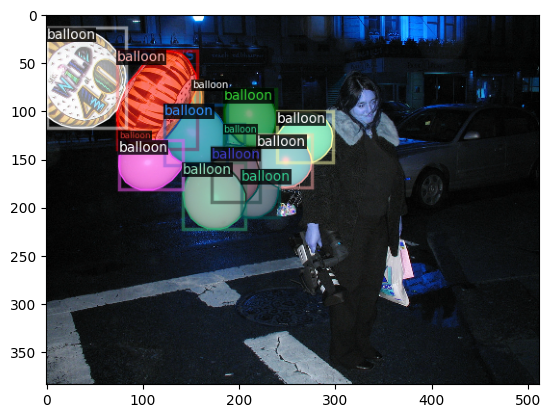

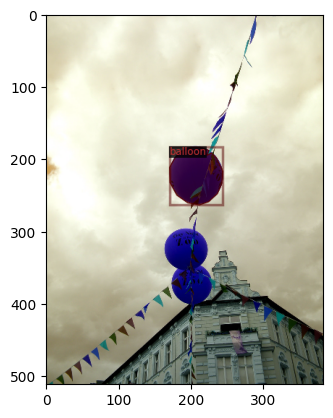

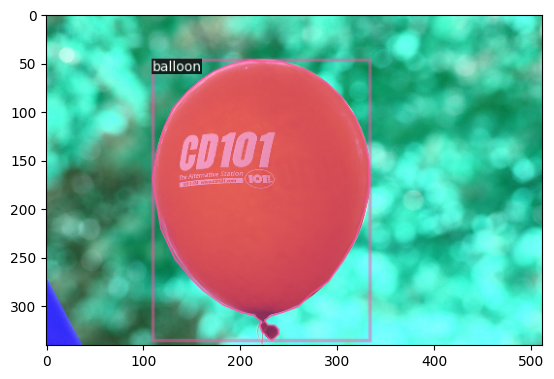

In [7]:
import random

dataset_dicts = get_balloon_dicts("balloon_dataset/balloon/train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    plt.figure()
    plt.imshow(out.get_image()[:, :, ::-1])

### Train
Now, let's fine-tune a COCO-pretrained FBNetV3A Mask R-CNN model on the balloon dataset.

In [8]:
for d in ["train", "val"]:
    MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"], evaluator_type="coco")

In [9]:
import os
from d2go.runner import GeneralizedRCNNRunner


def prepare_for_launch():
    runner = GeneralizedRCNNRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("faster_rcnn_fbnetv3a_C4.yaml"))
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATASETS.TRAIN = ("balloon_train",)
    cfg.DATASETS.TEST = ("balloon_val",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("faster_rcnn_fbnetv3a_C4.yaml")  # Let training initialize from model zoo
    cfg.MODEL.DEVICE = "cpu" #if ('CI' in os.environ) else "cuda"
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 5 if ('CI' in os.environ) else 600    # 600 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
    cfg.SOLVER.STEPS = []        # do not decay learning rate
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
    # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=False)

INFO:d2go.modeling.backbone.fbnet_v2:Build FBNet using unified arch_def:
trunk
- {'block_op': 'conv_k3', 'block_cfg': {'out_channels': 16, 'stride': 2}, 'stage_idx': 0, 'block_idx': 0}
- {'block_op': 'ir_k3', 'block_cfg': {'out_channels': 16, 'stride': 1, 'expansion': 1, 'less_se_channels': False}, 'stage_idx': 0, 'block_idx': 1}
- {'block_op': 'ir_k3', 'block_cfg': {'out_channels': 16, 'stride': 1, 'expansion': 1, 'less_se_channels': False}, 'stage_idx': 0, 'block_idx': 2}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 2, 'expansion': 4, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 0}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansion': 3, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 1}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansion': 3, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 2}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansio

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.conv

INFO:detectron2.utils.events: eta: 0:07:04  iter: 19  total_loss: 1.322  loss_cls: 0.6821  loss_box_reg: 0.5751  loss_rpn_cls: 0.06589  loss_rpn_loc: 0.004819  time: 0.7361  data_time: 0.1616  lr: 2.4208e-07  max_mem: 30M
INFO:detectron2.utils.events: eta: 0:06:53  iter: 39  total_loss: 1.472  loss_cls: 0.6827  loss_box_reg: 0.6588  loss_rpn_cls: 0.09364  loss_rpn_loc: 0.007643  time: 0.7459  data_time: 0.0089  lr: 2.3375e-07  max_mem: 30M
INFO:detectron2.utils.events: eta: 0:06:42  iter: 59  total_loss: 1.386  loss_cls: 0.6768  loss_box_reg: 0.5938  loss_rpn_cls: 0.07031  loss_rpn_loc: 0.003827  time: 0.7543  data_time: 0.0077  lr: 2.2542e-07  max_mem: 30M
INFO:detectron2.utils.events: eta: 0:06:29  iter: 79  total_loss: 1.313  loss_cls: 0.676  loss_box_reg: 0.5214  loss_rpn_cls: 0.07751  loss_rpn_loc: 0.0059  time: 0.7562  data_time: 0.0079  lr: 2.1708e-07  max_mem: 30M
INFO:detectron2.utils.events: eta: 0:06:13  iter: 99  total_loss: 1.542  loss_cls: 0.6826  loss_box_reg: 0.667  los

{'model_final': CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './output\\model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'FBNetV2C4Backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': [], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 64, 96, 128, 160]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'FBNetV2RpnHead', 'IN_FEATURES': ['trunk3'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_LOSS_TYPE': 'smooth_l1', 'BBOX_REG_LOSS_WEIGHT': 1.0, 'BBOX_REG_WEIGHTS': (1.0, 1.0, 1.0, 1.0)

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset.

In [10]:
metrics = runner.do_test(cfg, model)

INFO:d2go.runner.default_runner:Running evaluation for model tag default at iter None...
INFO:d2go.runner.default_runner:Building detection test loader for dataset: balloon_val ...
INFO:d2go.runner.default_runner:Using dataset mapper:
D2GoDatasetMapper:
  is_train: False
  image_loader: None
  tfm_gens: 
    - ResizeShortestEdge(short_edge_length=(224, 224), max_size=320, sample_style='choice')
INFO:detectron2.data.build:Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  balloon   | 50           |
|            |              |
INFO:detectron2.data.common:Serializing 13 elements to byte tensors and concatenating them all ...
INFO:detectron2.data.common:Serialized dataset takes 0.04 MiB
INFO:detectron2.evaluation.coco_evaluation:Trying to convert 'balloon_val' to COCO format ...
INFO:d2go.runner.default_runner:Adding visualization evaluator ...
INFO:detectron2.evaluation.evaluator:Start inference on 13 batches
INFO:d2go.utils.

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Recall     (AR) @[ IoU=0.50:0.

The evaluation results are

In [11]:
print(metrics)

OrderedDict([('default', OrderedDict([('balloon_val', OrderedDict([('bbox', {'AP': 1.8814417043135463, 'AP50': 4.496321191752204, 'AP75': 1.149059860114452, 'APs': 0.0, 'APm': 0.17690739662201513, 'APl': 4.271514997092163})]))]))])


## Export to Int8 Model
This section export int8 models using post-training quantization. For quantization-aware training, please see the [instructions](https://github.com/facebookresearch/d2go/tree/master/demo#quantization-aware-training).

In [12]:
import copy
from detectron2.data import build_detection_test_loader
from d2go.export.exporter import convert_and_export_predictor
from d2go.utils.testing.data_loader_helper import create_detection_data_loader_on_toy_dataset

import logging

# disable all the warnings
previous_level = logging.root.manager.disable
logging.disable(logging.INFO)

cfg_name = 'faster_rcnn_fbnetv3a_dsmask_C4.yaml'
pytorch_model = model_zoo.get(cfg_name, trained=True, device='cpu')
pytorch_model.eval()
cfg = model_zoo.get_config(cfg_name)

with create_detection_data_loader_on_toy_dataset(cfg, 224, 320, is_train=False) as data_loader:
    predictor_path = convert_and_export_predictor(
            cfg,
            copy.deepcopy(pytorch_model),
            "torchscript_int8",
            './',
            data_loader,
        )

# recover the logging level
logging.disable(previous_level)

model_0499999.pth: 31.3MB [00:08, 3.65MB/s]                                                                            
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


C:\Anaconda\envs\d2go_env\lib\site-packages\torch\ao\quantization\observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(
C:\Anaconda\envs\d2go_env\lib\site-packages\detectron2\structures\image_list.py:85: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert t.shape[:-2] == tensors[0].shape[:-2], t.shape
C:\Anaconda\envs\d2go_env\lib\site-packages\detectron2\structures\boxes.py:151: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize

Create the predictor using the exported int8 model

In [13]:
from mobile_cv.predictor.api import create_predictor
model = create_predictor(predictor_path)

INFO:mobile_cv.predictor.api:Creating predictor from structured folder: ./torchscript_int8
INFO:mobile_cv.predictor.api:Loading predictor info from ./torchscript_int8\predictor_info.json
INFO:mobile_cv.predictor.api:Loading from ModelInfo: ModelInfo(path='.', export_method='d2go.export.torchscript.TracingAdaptedTorchscriptExport', load_kwargs={'torchscript_filename': 'model.jit', 'tracing_adapted': True, 'inputs_schema': {'_target_': 'detectron2.export.flatten.TupleSchema', 'schemas': [{'_target_': 'detectron2.export.flatten.IdentitySchema'}], 'sizes': [1]}, 'outputs_schema': {'_target_': 'detectron2.export.flatten.InstancesSchema', 'schemas': [{'_target_': 'detectron2.export.flatten.TensorWrapSchema', 'class_name': 'detectron2.structures.Boxes'}, {'_target_': 'detectron2.export.flatten.IdentitySchema'}, {'_target_': 'detectron2.export.flatten.IdentitySchema'}], 'sizes': [1, 1, 1], 'keys': ['pred_boxes', 'pred_classes', 'scores']}})
INFO:d2go.export.torchscript:The model is tracing ada

Make predictions and Visualize the output

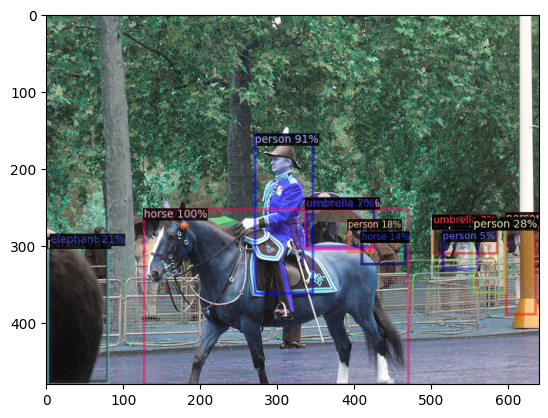

In [14]:
from d2go.utils.demo_predictor import DemoPredictor
predictor = DemoPredictor(model)
outputs = predictor(im)

#("balloon_train")
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("coco_2017_train"))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])